In [235]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import pandas as pd
from sklearn.manifold import MDS
from mpl_toolkits.basemap import Basemap
sns.set(color_codes=True)

## 1. Read data

In [236]:
# should take about 30 sec to read
# hyads_df1 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df2 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df3 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df = pd.concat([hyads_df1, hyads_df2, hyads_df3], 1)
# del hyads_df1, hyads_df2, hyads_df3
# hyads = hyads_df.values  # as numpy
# hyads_df.iloc[:10,:10]

In [237]:
hyads_df = pd.read_csv("./model_dev_data/hyads_zipcode_3digits.csv", index_col=0)
hyads = hyads_df.values

In [238]:
hyads_df

,100,101,102,103,104,105,106,107,108,109,...,990,991,992,993,994,995,996,997,998,999
fid,,,,,,,,,,,,,,,,,,,,,
10,4.605191,4.345238,4.475877,11.062500,5.629630,8.987269,7.061111,5.458333,5.720238,9.642466,...,1.424330,1.264805,1.371599,0.433333,0.0,0.175801,0.380165,0.539282,0.874387,0.777295
1001,41.020492,40.359524,37.561404,37.204861,35.530864,28.273148,28.561111,29.837963,32.595238,29.652968,...,0.000000,0.044776,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1004,38.586066,38.365476,36.868421,31.628472,40.895062,36.802083,37.605556,36.643519,31.297619,35.040868,...,0.000000,0.194030,0.000000,0.000000,0.0,0.028986,0.000000,0.121951,0.316667,0.750000
10043,94.733607,100.936905,91.199561,78.156250,91.438272,70.151620,41.000000,50.097222,47.059524,56.043607,...,0.000000,0.268657,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
10071,26.980874,26.828571,24.640351,27.006944,28.901235,26.668981,23.116667,23.796296,18.386905,31.755479,...,0.125000,0.343284,0.035714,0.000000,0.0,0.014493,0.022472,0.033629,0.500000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,30.445355,29.897619,28.719298,30.197917,34.012346,33.753472,26.405556,28.467593,29.988095,33.673516,...,0.000000,0.059701,0.000000,0.000000,0.0,0.000000,0.000000,0.128184,0.100000,0.416667
994,36.649590,36.949405,36.843750,37.200521,37.418210,35.687789,32.916667,35.557870,36.346726,35.219635,...,0.078125,0.231343,0.000000,0.027778,0.0,0.050725,0.045412,0.274755,0.490000,0.523810
995,44.054645,43.623810,42.776316,41.604167,44.246914,46.539352,41.016667,43.236111,43.857143,48.331963,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [239]:
# hyads1 = hyads_df.iloc[:,:15000]
# hyads1.to_csv("./model_dev_data/hyads_coal_part1.csv")
# hyads2 = hyads_df.iloc[:,15001:30000]
# hyads2.to_csv("./model_dev_data/hyads_coal_part2.csv")
# hyads3 = hyads_df.iloc[:,30001:-1]
# hyads3.to_csv("./model_dev_data/hyads_coal_part3.csv")

In [240]:
# rows are power plants
# index is fid (power plant id)
# columns zip codes

In [241]:
power_plants = pd.read_csv("./model_dev_data/power_plant_info.csv", index_col=0)
power_plants = power_plants[power_plants.index.isin(hyads_df.index)]
power_plants

,lat,lon
fid,,
3,31.0069,-88.0103
7,34.0128,-85.9708
8,33.6446,-87.2003
10,32.6017,-87.7811
26,33.2442,-86.4567
...,...,...
54755,36.4364,-77.6167
55076,33.3761,-89.2183
55479,44.2862,-105.3843


In [242]:
my_USA_map = './model_dev_data/us-states.json'

/home/mauriciogtec/anaconda3/envs/cuda10.1/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


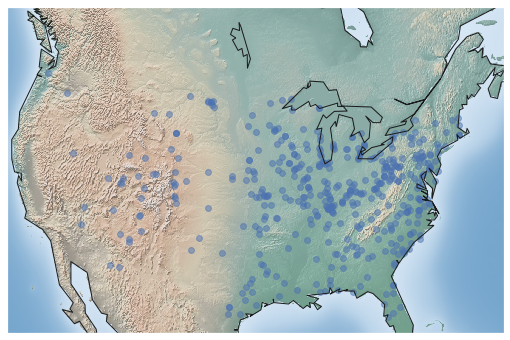

In [243]:
plt.figure(figsize=(10, 6))

map = Basemap(
    projection='cass',
    lat_0 = 39.0,
    lon_0 = -96.0,
    llcrnrlon=-120.0,
    urcrnrlon=-60.0,
    llcrnrlat=25.0,
    urcrnrlat=50.0)

map.shadedrelief()
map.drawcoastlines()

lon, lat= map(power_plants['lon'].values, power_plants['lat'].values)
plt.scatter(lon, lat, s=35, marker='o', alpha=0.5)

## 2. EDA

min: 0.0
max: 443.4018459240289


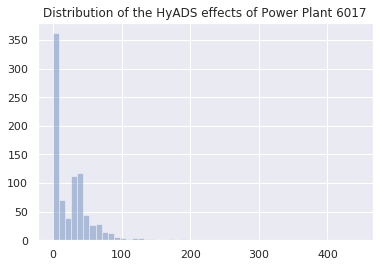

In [288]:
i = np.random.choice(range(hyads.shape[0]))
x = hyads[i,:]
sns.distplot(x, kde=False)
plt.title(f"Distribution of the HyADS effects of Power Plant {hyads_df.index[i]}")

print("min:", x.min())
print("max:", x.max())

min: -3.0
max: 2.6002729385186454


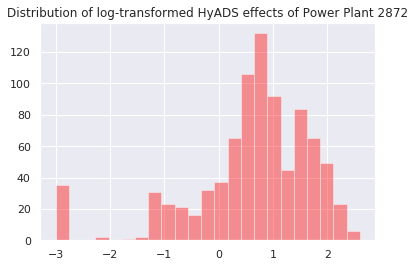

In [291]:
i = np.random.choice(range(hyads.shape[0]))
x = np.log10(1e-3 + hyads[i,:])
sns.distplot(x, kde=False, color="red")
plt.title(f"Distribution of log-transformed HyADS effects of Power Plant {hyads_df.index[i]}")

print("min:", x.min())
print("max:", x.max())

Text(0.5, 1.0, 'Distribution of the HyADS effects of Power Plant 2872')

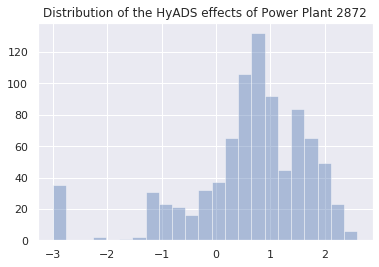

In [292]:
sns.distplot(x, kde=False)
plt.title(f"Distribution of the HyADS effects of Power Plant {hyads_df.index[i]}")

min: 5.1380589896214905
max: 184.53875152625162


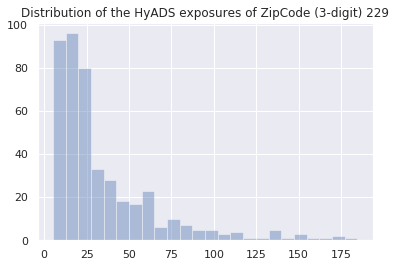

In [293]:
j = np.random.choice(range(hyads.shape[0]))
x = hyads[:,j]
sns.distplot(x, kde=False)
plt.title(f"Distribution of the HyADS exposures of ZipCode (3-digit) {hyads_df.columns[j]}")

print("min:", x.min())
print("max:", x.max())

min: -1.114114001518732
max: 2.6509394102487454


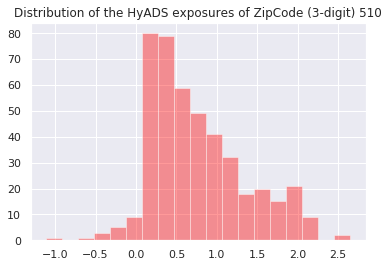

In [294]:
j = np.random.choice(range(hyads.shape[0]))
x = np.log10(1e-3 + hyads[:,j])
sns.distplot(x, kde=False, color="red")
plt.title(f"Distribution of the HyADS exposures of ZipCode (3-digit) {hyads_df.columns[j]}")

print("min:", x.min())
print("max:", x.max())

## 3. Mixture Model (Power Plant Clustering)


In [296]:
n_comps = 5
n_plants = hyads.shape[0]
# n_zip_samples = 45000
# samples = np.random.choice(hyads.shape[1], size=n_zip_samples)
# hyads0 = hyads[:, samples]

In [321]:
use_mds = False

gmm = GaussianMixture(
    n_components=n_comps,
    covariance_type="full")


inputs = np.log10(1e-3 + hyads)
if use_mds:
    inputs = MDS(n_components=2).fit_transform(inputs)

gmm.fit(inputs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [322]:
phat = gmm.predict_proba(inputs)
print("coverged:", gmm.converged_)
phat[:10, :]

coverged: True


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [323]:
phat.sum(0)

array([107., 120., 117.,  79.,  21.])

In [324]:
labels = np.array([np.random.choice(range(n_comps), p=x / x.sum()) for x in phat])

colorpal = sns.color_palette("husl", n_comps).as_hex()
colors = np.array([colorpal[l] for l in labels])

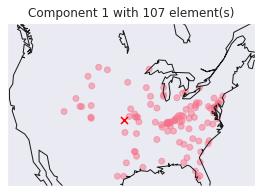

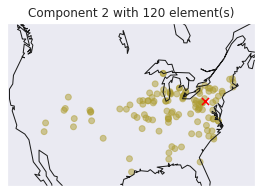

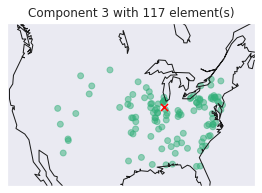

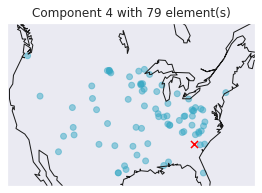

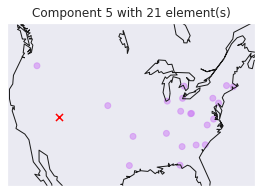

In [325]:
for k in range(n_comps):
    plt.figure(figsize=(5, 3))
    # map.shadedrelief()
    map.drawcoastlines()
    ix = np.where(labels == k)
    lon, lat = map(power_plants['lon'].values[ix], power_plants['lat'].values[ix])
    plt.scatter(lon, lat, s=35, c=colors[ix], marker='o', alpha=0.5)
    # plot centroid
    
    centroids = power_plants.loc[hyads_df.index[ix]].mean(0)
    lon_c, lat_c = map(centroids['lon'], centroids['lat'])
    plt.scatter(lon_c, lat_c, s=50, c="red", marker='x')
    
    plt.title(f"Component {k + 1} with {len(ix[0])} element(s)")
    plt.show()

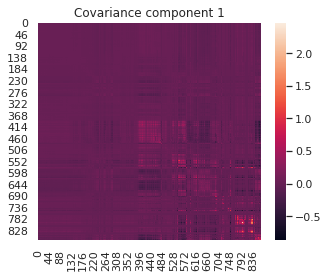

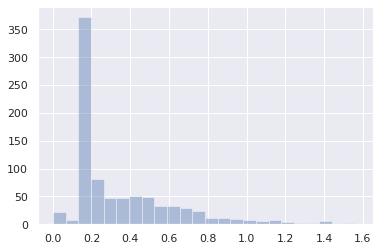

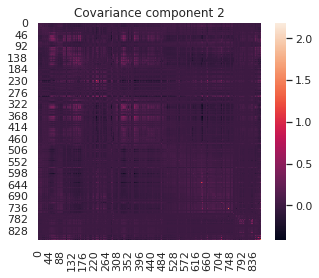

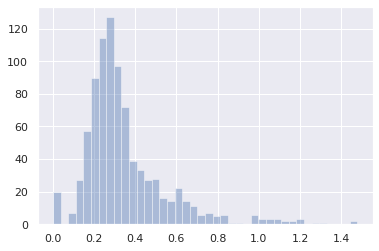

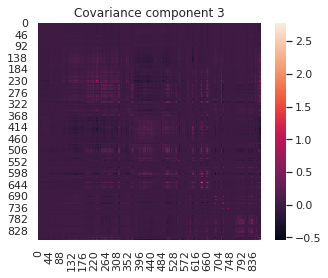

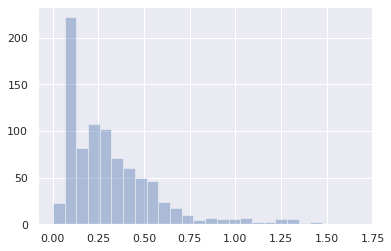

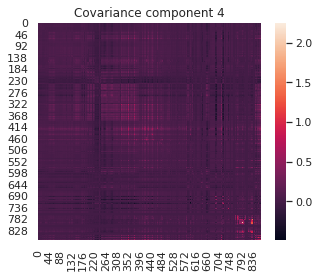

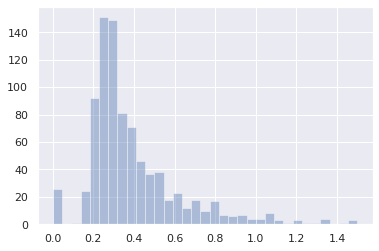

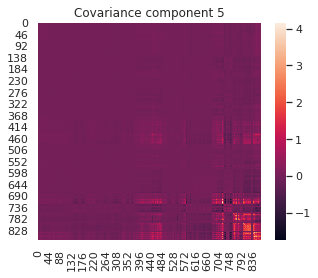

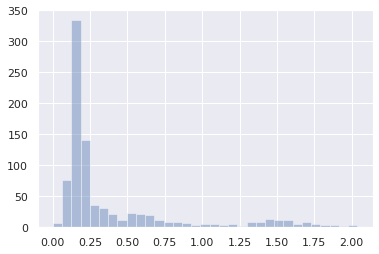

In [327]:
cov = gmm.covariances_

for k in range(n_comps):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cov[k])
    plt.title(f"Covariance component {k + 1}")
    plt.show()
    std = np.sqrt(np.diag(cov[k]))
    sns.distplot(std, kde=False)
    plt.show()

Text(0.5, 1.0, 'Standard deviations of Power Plant effects (log-transformed)')

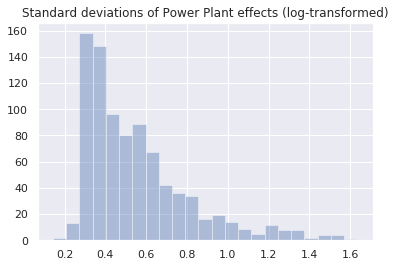

In [270]:
sns.distplot(log_hyads.std(0), kde=False);
plt.title("Standard deviations of Power Plant effects (log-transformed)")

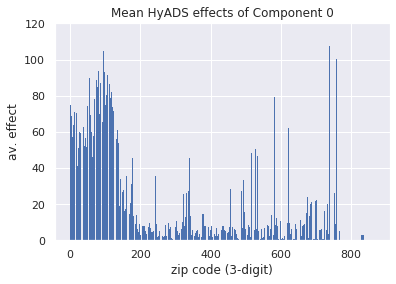

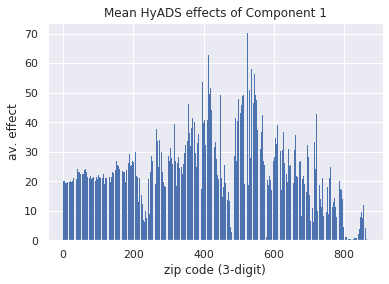

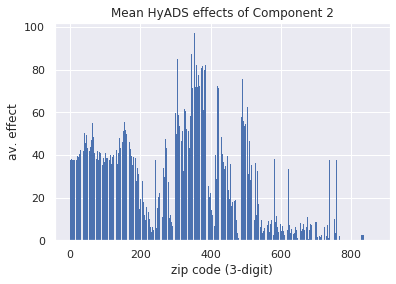

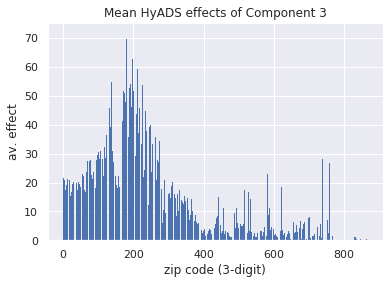

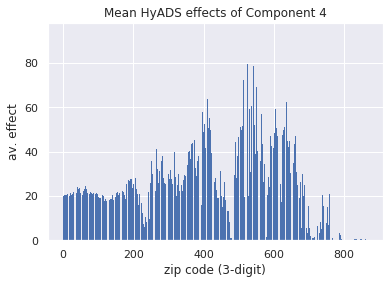

In [271]:
# distributions of effects by label

for k in range(n_comps):
    x = hyads[labels == k, :].mean(axis=0)
    plt.bar(range(len(x)), x, lw=0.0)
    plt.title(f"Mean HyADS effects of Component {k}")
    plt.xlabel("zip code (3-digit)")
    plt.ylabel("av. effect")
    plt.show()

<!-- How does zip code assignment matches Hyads? -->

In [204]:
# plt.hist(w)

In [ ]:
# prediction for each power plant using mean of component
# what residuals look like? low-variance and Gaussian

# bipartite graph partitioning
# modify stochastic block-model
# thresholding for binary bipartite model
# visualizing graph algorithms in the binary graphs

## 4. Mixture Model (Zip Code Clustering)


In [335]:
zip_codes = pd.read_csv("model_dev_data/zip_codes.csv", index_col=0)
zip_codes.index = [str(x)[:3] for x in zip_codes.index.values]
zip_codes.head()

,LAT,LNG
601,18.180555,-66.749961
602,18.361945,-67.175597
603,18.455183,-67.119887
606,18.158345,-66.932911
610,18.295366,-67.125135


In [338]:
n_comps = 5
hyads_t = hyads.transpose()

n_zips = hyads_t.shape[0]
# n_zip_samples = 45000
# samples = np.random.choice(hyads.shape[1], size=n_zip_samples)
# hyads0 = hyads[:, samples]

In [339]:
use_mds = False

gmm = GaussianMixture(
    n_components=n_comps,
    covariance_type="full")


inputs = np.log10(1e-3 + hyads_t)
if use_mds:
    inputs = MDS(n_components=2).fit_transform(inputs)

gmm.fit(inputs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [340]:
phat = gmm.predict_proba(inputs)
print("coverged:", gmm.converged_)
phat[:10, :]

coverged: True


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [341]:
phat.sum(0)

array([378.,  89., 256.,  31., 113.])

In [342]:
labels = np.array([np.random.choice(range(n_comps), p=x / x.sum()) for x in phat])

colorpal = sns.color_palette("husl", n_comps).as_hex()
colors = np.array([colorpal[l] for l in labels])

In [344]:
zip_codes.columns

Index(['LAT', 'LNG'], dtype='object')

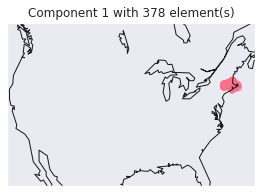

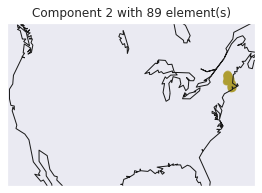

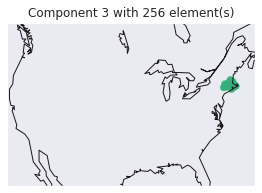

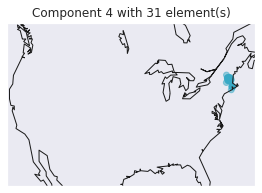

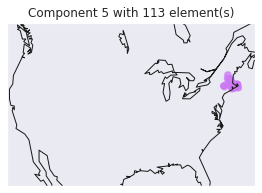

In [347]:
for k in range(n_comps):
    plt.figure(figsize=(5, 3))
    # map.shadedrelief()
    map.drawcoastlines()
    ix = np.where(labels == k)
    lon, lat = map(zip_codes['LNG'].values[ix], zip_codes['LAT'].values[ix])
    plt.scatter(lon, lat, s=35, c=colors[ix], marker='o', alpha=0.5)
    # plot centroid
    
#     centroids = zip_codes.loc[hyads_t.index[ix]].mean(0)
#     lon_c, lat_c = map(centroids['LNG'], centroids['LAT'])
#     plt.scatter(lon_c, lat_c, s=50, c="red", marker='x')
    
    plt.title(f"Component {k + 1} with {len(ix[0])} element(s)")
    plt.show()

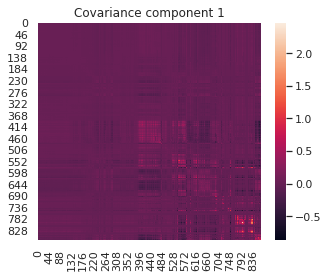

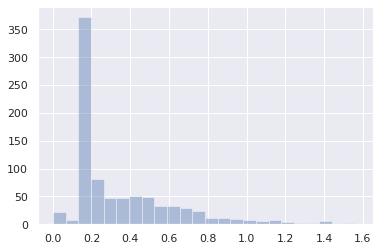

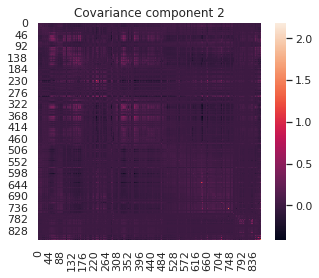

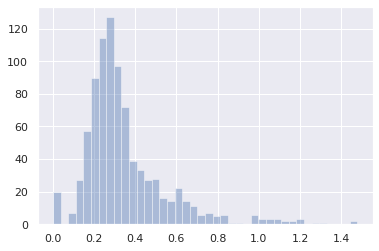

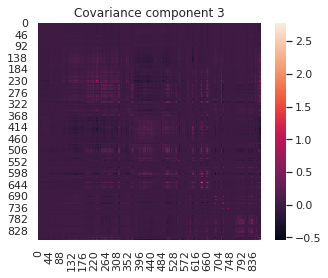

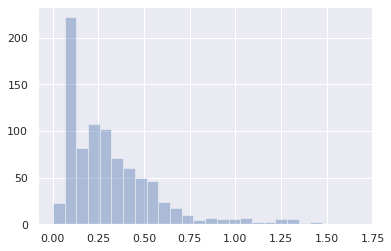

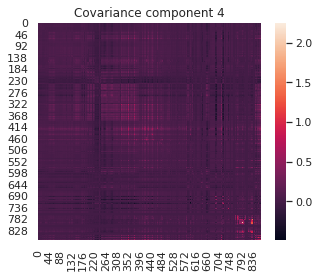

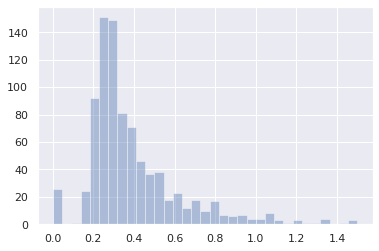

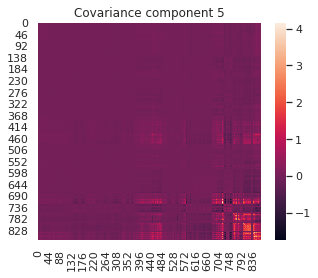

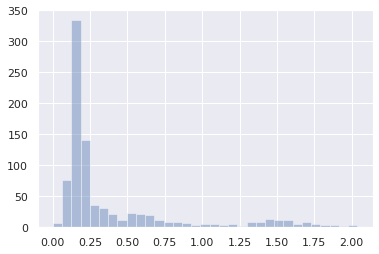

In [327]:
cov = gmm.covariances_

for k in range(n_comps):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cov[k])
    plt.title(f"Covariance component {k + 1}")
    plt.show()
    std = np.sqrt(np.diag(cov[k]))
    sns.distplot(std, kde=False)
    plt.show()

Text(0.5, 1.0, 'Standard deviations of Power Plant effects (log-transformed)')

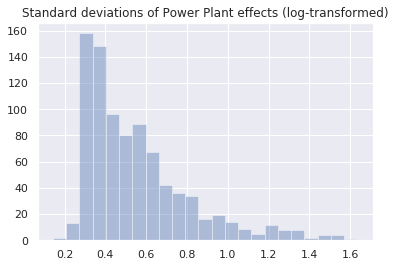

In [270]:
sns.distplot(log_hyads.std(0), kde=False);
plt.title("Standard deviations of Power Plant effects (log-transformed)")

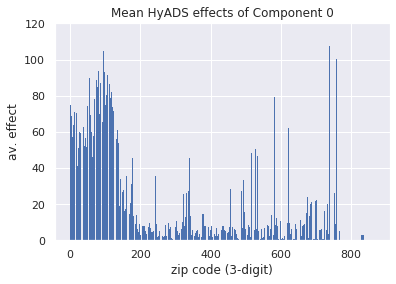

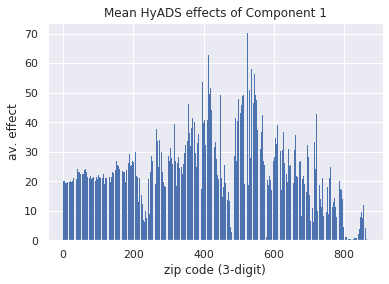

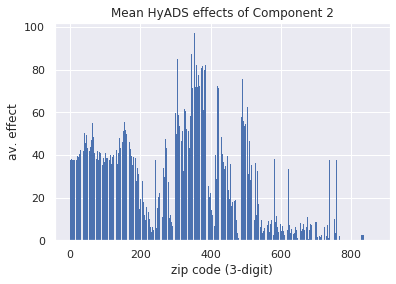

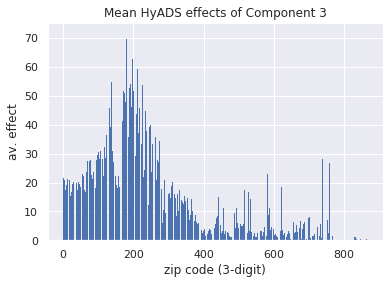

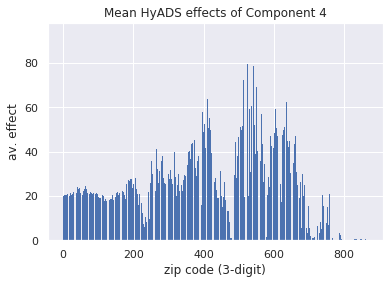

In [271]:
# distributions of effects by label

for k in range(n_comps):
    x = hyads[labels == k, :].mean(axis=0)
    plt.bar(range(len(x)), x, lw=0.0)
    plt.title(f"Mean HyADS effects of Component {k}")
    plt.xlabel("zip code (3-digit)")
    plt.ylabel("av. effect")
    plt.show()

<!-- How does zip code assignment matches Hyads? -->

In [204]:
# plt.hist(w)

In [ ]:
# prediction for each power plant using mean of component
# what residuals look like? low-variance and Gaussian